In [4]:
import scipy.linalg
import scipy.optimize
import sys
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [16]:
ttfu = importlib.reload(ttfu)
file_name = './data/total_station/20220505_cones/theodolite_reference_prisms.txt'
m1, m2, m3, T_1, T_2, T_3 = tfu.read_marker_file(file_name, 1, 1)

In [34]:
ttfu = importlib.reload(ttfu)

# 05 05 2022
Dist_prism_12 = 0.3819811991689936
Dist_prism_13 = 0.4426382054042266
Dist_prism_23 = 0.2564685508415531

#path = "./data/raw_data/20220505_cones/corrected_raw_data/L-1-6-0_"
path = "./data/raw_data/20220505_cones/raw_data/L-1-6-0_"
trimble_1 = ttfu.read_prediction_data_resection_csv_file(path+"1.csv")
trimble_2 = ttfu.read_prediction_data_resection_csv_file(path+"2.csv")
trimble_3 = ttfu.read_prediction_data_resection_csv_file(path+"3.csv")

print(len(np.array(trimble_1)),len(np.array(trimble_2)),len(np.array(trimble_3)))

p1 = np.array(trimble_1)[:,1:5]
p2 = np.array(trimble_2)[:,1:5]
p3 = np.array(trimble_3)[:,1:5]

p1t = T_1@p1.T
p2t = T_2@p2.T
p3t = T_3@p3.T

2269 2269 2269


<IPython.core.display.Javascript object>


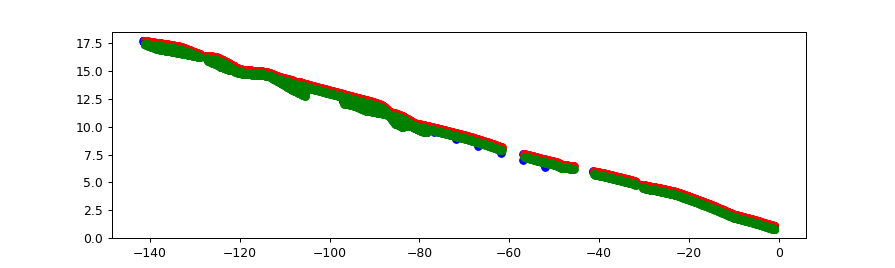

In [35]:
%matplotlib notebook

plt.figure(figsize=(10,3))
plt.scatter(p1t[0,:],p1t[1,:], color='b')
plt.scatter(p2t[0,:],p2t[1,:], color='r')
plt.scatter(p3t[0,:],p3t[1,:], color='g')
plt.show()

<IPython.core.display.Javascript object>


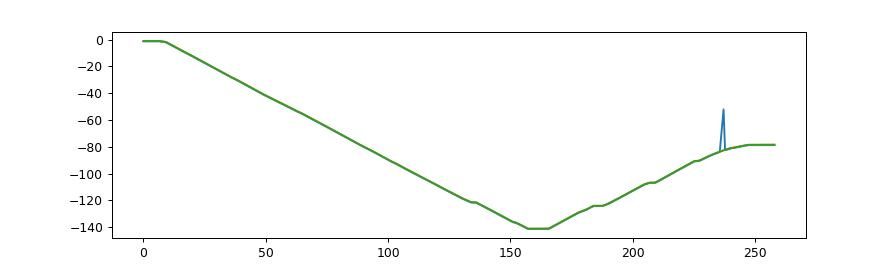

In [36]:
plt.figure(figsize=(10,3))
offset_timestamp = min(trimble_1[0,0],trimble_2[0,0],trimble_3[0,0])
plt.plot(trimble_1[:,0]-offset_timestamp,p1t[0,:])
plt.plot(trimble_2[:,0]-offset_timestamp,p2t[0,:])
plt.plot(trimble_3[:,0]-offset_timestamp,p3t[0,:])
plt.show()

<IPython.core.display.Javascript object>


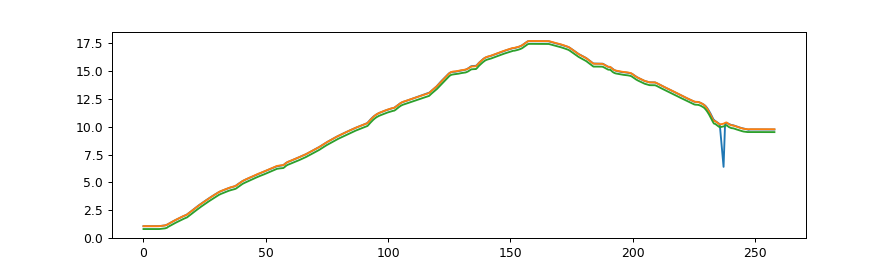

In [37]:
plt.figure(figsize=(10,3))
offset_timestamp = min(trimble_1[0,0],trimble_2[0,0],trimble_3[0,0])
plt.plot(trimble_1[:,0]-offset_timestamp,p1t[1,:])
plt.plot(trimble_2[:,0]-offset_timestamp,p2t[1,:])
plt.plot(trimble_3[:,0]-offset_timestamp,p3t[1,:])
plt.show()

<IPython.core.display.Javascript object>


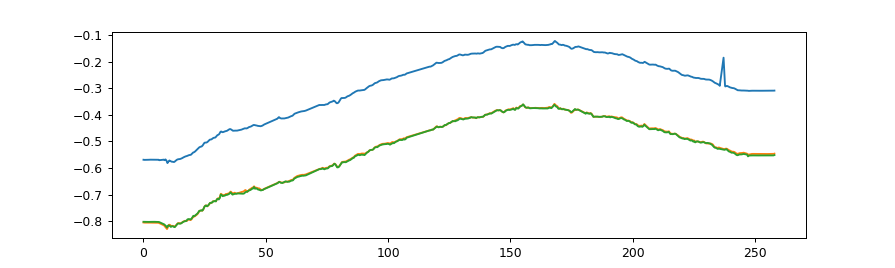

In [38]:
plt.figure(figsize=(10,3))
offset_timestamp = min(trimble_1[0,0],trimble_2[0,0],trimble_3[0,0])
plt.plot(trimble_1[:,0]-offset_timestamp,p1t[2,:])
plt.plot(trimble_2[:,0]-offset_timestamp,p2t[2,:])
plt.plot(trimble_3[:,0]-offset_timestamp,p3t[2,:])
plt.show()

In [39]:
dist_prism = []
timestamp = trimble_1[:,0]
for i in range(0,len(timestamp)-1):
    dp1 = abs(np.linalg.norm(p1t.T[i,0:3]-p2t.T[i,0:3])-Dist_prism_12)*1000
    dp2 = abs(np.linalg.norm(p1t.T[i,0:3]-p3t.T[i,0:3])-Dist_prism_13)*1000
    dp3 = abs(np.linalg.norm(p3t.T[i,0:3]-p2t.T[i,0:3])-Dist_prism_23)*1000
    dist_prism.append(np.array([timestamp[i], dp1, dp2, dp3]))
dist_prism = np.array(dist_prism)

Mean inter-prism [mm]:  55.89 54.95 2.05
Std inter-prism [mm]:  1017.66 1011.11 2.157


<IPython.core.display.Javascript object>


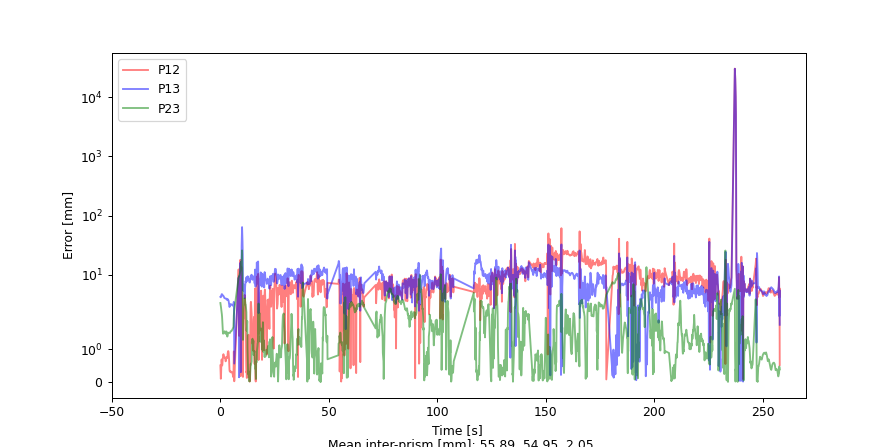

In [40]:
print("Mean inter-prism [mm]: ", round(np.mean(dist_prism[:,1]),2), round(np.mean(dist_prism[:,2]),2), round(np.mean(dist_prism[:,3]),2))
print("Std inter-prism [mm]: ", round(np.std(dist_prism[:,1]),2), round(np.std(dist_prism[:,2]),2), round(np.std(dist_prism[:,3]),3))
plt.figure(figsize=(10,5))
offset_timestamp = min(dist_prism[:,0])
plt.subplot(111)
plt.plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,1], label="P12", color="red", alpha=0.5)
plt.plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,2], label="P13", color="blue", alpha=0.5)
plt.plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,3], label="P23", color="green", alpha=0.5)
ax = plt.gca()
ax.set_yscale('symlog')
plt.legend(loc='best')
ax.set_ylabel("Error [mm]")
limitx = [-50, 270]
ax.set_xlim(limitx)
ax.set_xlabel("Time [s] \n Mean inter-prism [mm]: " + str(round(np.mean(dist_prism[:,1]),2)) + "  " + str(round(np.mean(dist_prism[:,2]),2)) + "  " + str(round(np.mean(dist_prism[:,3]),2))
             + "\n Std inter-prism [mm]: " + str(round(np.std(dist_prism[:,1]),2)) + "  " + str(round(np.std(dist_prism[:,2]),2)) + "  " + str(round(np.std(dist_prism[:,3]),2)))
#plt.savefig("./figs/20220505_cones_dynamic_L-1-6.jpg")
#plt.savefig("./figs/20220505_cones_dynamic.jpg")
#plt.savefig("./figs/20220523_empty.jpg")
plt.show()  

In [126]:
# Convert point data to csv file
ttfu = importlib.reload(ttfu)

# Trajectory total station (time, point data) x3
ttfu.Convert_datap_to_csv(np.array(trimble_1)[:,0], np.array(p1s_r), "./data/prediction/nr_trimble_1.csv")
ttfu.Convert_datap_to_csv(np.array(trimble_2)[:,0], np.array(p2s_rarr), "./data/prediction/nr_trimble_2.csv")
ttfu.Convert_datap_to_csv(np.array(trimble_3)[:,0], np.array(p3s_rarr), "./data/prediction/nr_trimble_3.csv")

Conversion done !
Conversion done !
Conversion done !


In [47]:
ttfu = importlib.reload(ttfu)
save_tf = True
name_file = './data/calibration/tf_automated_resection/20220505_empty_tf_a.csv'
if(save_tf):
    ttfu.save_tf(np.identity(4), T12, T13, name_file)

Conversion done !
